In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave
from scipy.ndimage import distance_transform_edt

In [2]:
#image = imread("/home/robin/Downloads/saturation.png")[:1000,:1000]
img = imread('rgb_good_.jpg')[:1000,:1000]

In [43]:
distance = distance_transform_edt(image)

<IPython.core.display.Javascript object>


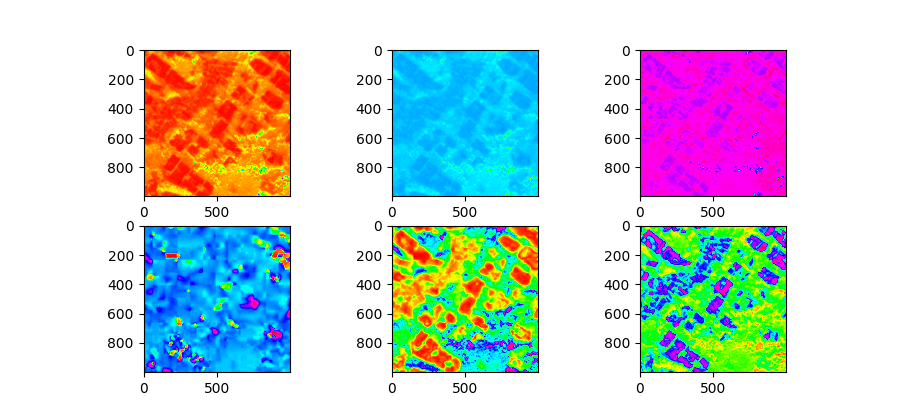

In [10]:
from skimage.color import rgb2hed
from skimage.color import rgb2hsv


hed = rgb2hed(img)
hsv = rgb2hsv(img)

plt.figure()

plt.subplot(2,3,1)
plt.imshow(hed[...,0], cmap ='hsv')
plt.subplot(2,3,2)
plt.imshow(hed[...,1], cmap ='hsv')
plt.subplot(2,3,3)
plt.imshow(hed[...,2], cmap ='hsv')
plt.subplot(2,3,4)
plt.imshow(hsv[...,0], cmap ='hsv')
plt.subplot(2,3,5)
plt.imshow(hsv[...,1], cmap ='hsv')
plt.subplot(2,3,6)
plt.imshow(hsv[...,2], cmap ='hsv')
plt.show()

<IPython.core.display.Javascript object>


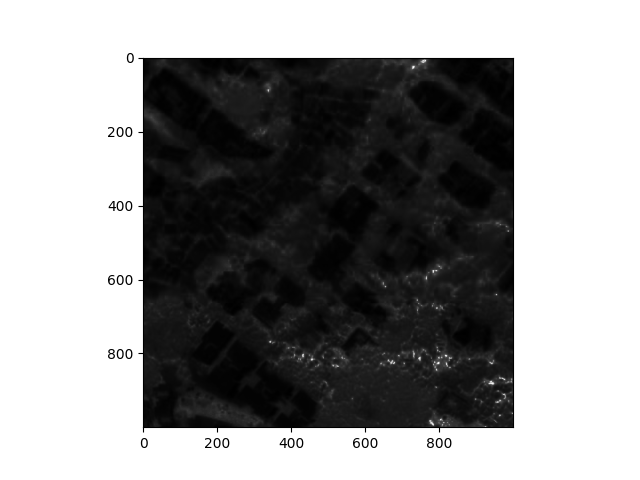

In [6]:
from skimage.color import rgb2hed

hed = rgb2hed(img)

plt.figure()
plt.imshow(hed[:,:,0], cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


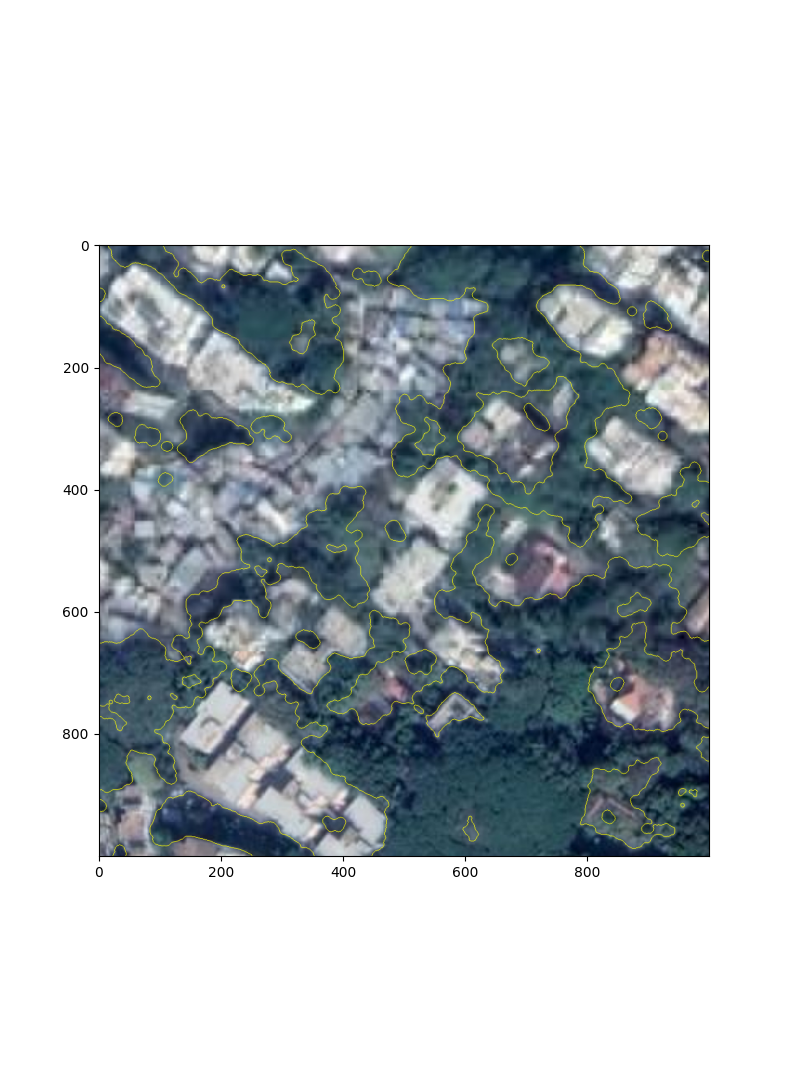

In [12]:
from skimage.color import rgb2hed
from skimage.filters import threshold_otsu
from skimage.morphology import opening,closing,disk
from skimage.segmentation import mark_boundaries
from skimage import img_as_float

#hed = rgb2hed(img)
t = threshold_otsu(hsv[...,1])
mask = hsv[...,1]>t
mask = closing(opening(mask, disk(7)), disk(3))
mask1 = img_as_float(mask)

plt.figure(figsize = (12,12))
plt.imshow(mark_boundaries(img,mask))
plt.show()

In [12]:
mask.dtype

dtype('uint8')

<IPython.core.display.Javascript object>


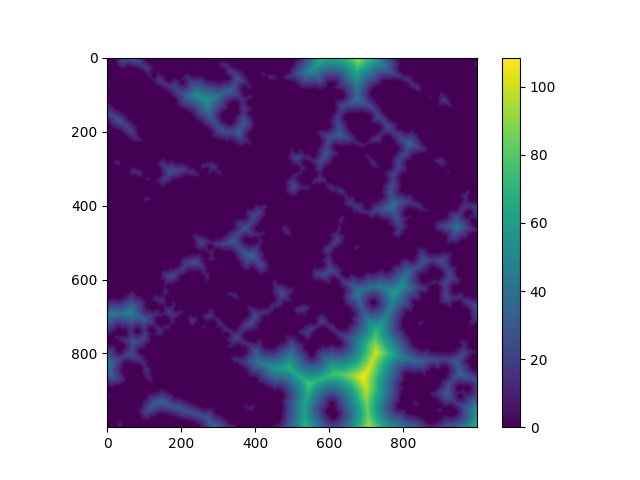

In [13]:
from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(mask)

plt.figure()
plt.imshow(distance)
plt.colorbar()
plt.show()

In [14]:
from skimage.feature import peak_local_max

markers = peak_local_max(distance, min_distance=3, indices=True)

/tmp/ipykernel_18096/494535327.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = peak_local_max(distance, min_distance=3, indices=True)


In [15]:
print(markers.shape)

(233, 2)


<IPython.core.display.Javascript object>


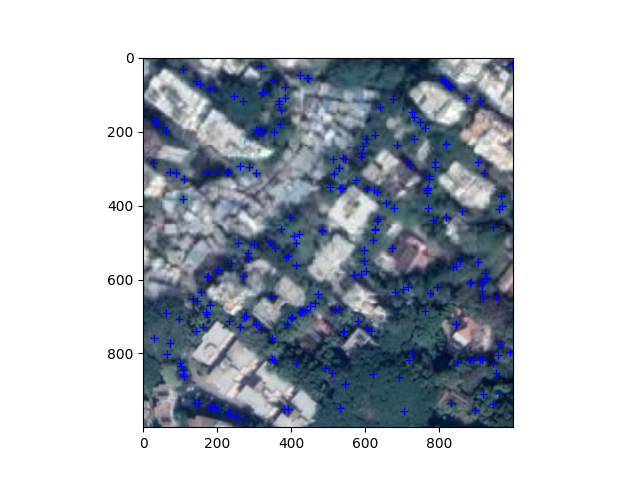

In [16]:
plt.figure()
plt.imshow(img)
for m in markers:
    plt.plot(m[1],m[0],'b+')
plt.show()

/home/robin/spacex/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_18096/1685421639.py:6: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = label(peak_local_max(distance, min_distance=2, indices=False))


<IPython.core.display.Javascript object>


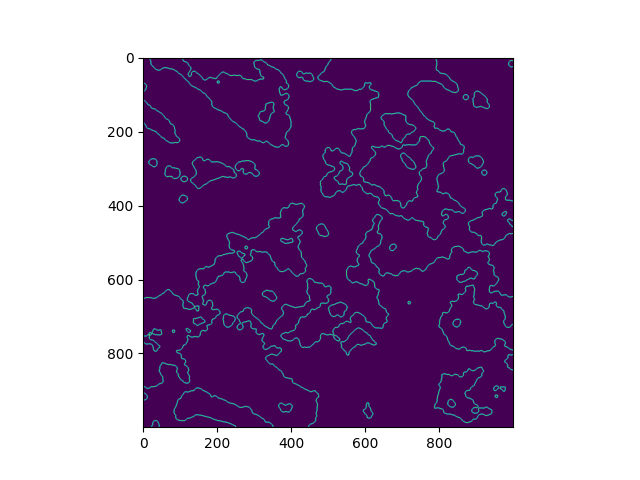

In [17]:
from skimage.filters.rank import gradient
from skimage.measure import label
from skimage.morphology import watershed

grad = gradient(mask1,disk(1))
markers = label(peak_local_max(distance, min_distance=2, indices=False))

plt.figure()
plt.imshow(grad)
plt.show()

/home/robin/spacex/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


<IPython.core.display.Javascript object>


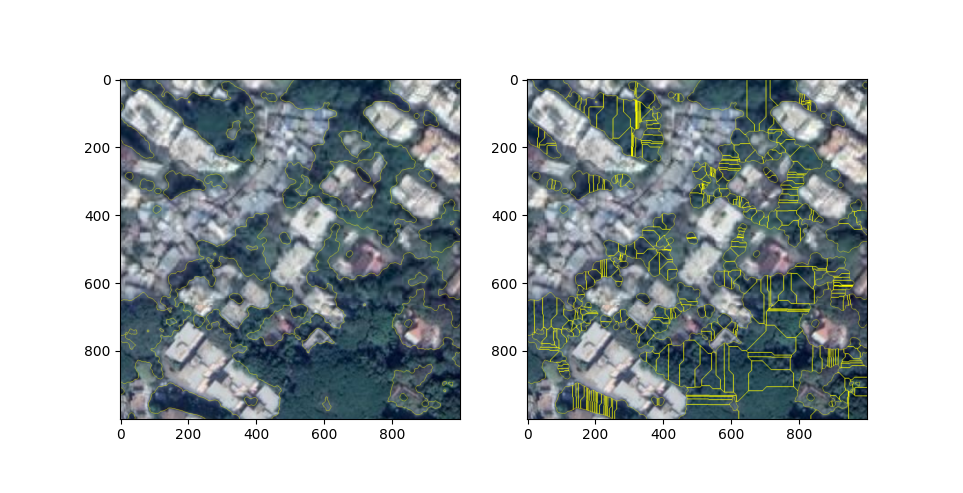

<IPython.core.display.Javascript object>


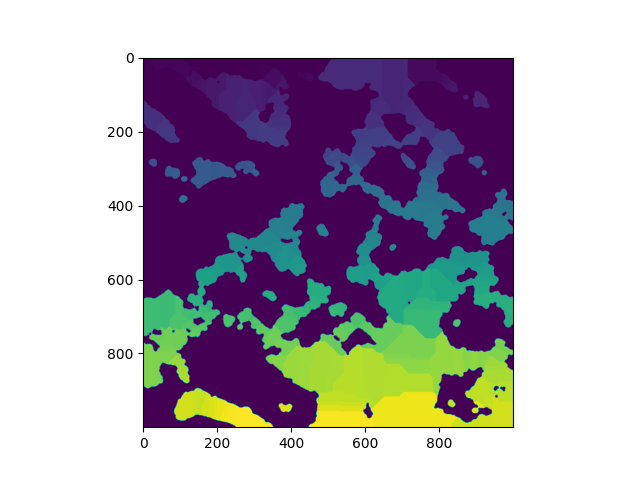

In [18]:
ws = watershed(grad,markers,mask=mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(img, mask))
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(img,ws))
plt.figure()
plt.imshow(ws)
plt.show()

In [24]:
>>> from skimage import data
>>> from skimage.morphology import disk, ball
>>> from skimage.filters.rank import gradient
>>> import numpy as np
>>> img = data.camera()
>>> rng = np.random.default_rng()
>>> volume = rng.integers(0, 255, size=(10,10,10), dtype=np.uint8)
>>> out = gradient(img, disk(5))
>>> out_vol = gradient(volume, ball(5))